Run the following two cells to download the dataset

In [ ]:
!gdown 1uljboCJukoztznUtzKTYJVNotUklCnPG

Downloading...
From: https://drive.google.com/uc?id=1uljboCJukoztznUtzKTYJVNotUklCnPG
To: /content/DATA.zip
100% 375M/375M [00:01<00:00, 189MB/s]


In [ ]:
!unzip -q '/content/DATA.zip'

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import numpy as np
import pandas as pd
import os
from tensorflow.keras.models import Model, load_model
from tensorflow import expand_dims

In [ ]:
# customize the model 
def custom_model(INPUT_IMG_SHAPE=(128,128,3)):
  # define the base model
  base_model = VGG16(weights='imagenet', include_top=False, input_shape = INPUT_IMG_SHAPE)

  # freeze the model
  base_model.trainable = False

  # create new model on top
  inputs = keras.Input(shape=INPUT_IMG_SHAPE)

  x = base_model(inputs, training=False)
  x = GlobalAveragePooling2D()(x)

  x = Dense(units=1, activation='relu')(x)
  output = Dense(units=2, activation='sigmoid')(x)

  model = Model(inputs , output)

  return model


In [ ]:
INPUT_IMG_SHAPE = (256,256,3)

In [ ]:
DATASET_DIR = '/content/DATA'
HEXNUT_DATASET = os.path.join(DATASET_DIR, 'MARBLE_SURFACE')


In [ ]:
# prepare the training data
train_data_gen = ImageDataGenerator()
train_data = train_data_gen.flow_from_directory(
    directory = os.path.join(HEXNUT_DATASET, 'train'),
    target_size = (256,256)
)

Found 2247 images belonging to 2 classes.


In [ ]:
train_data.image_shape

(256, 256, 3)

In [ ]:
# prepare the test data
test_data_gen = ImageDataGenerator()
test_data = test_data_gen.flow_from_directory(
    directory = os.path.join(HEXNUT_DATASET, 'test'),
    target_size = (256,256)
)

Found 688 images belonging to 2 classes.


In [ ]:
test_data.image_shape

(256, 256, 3)

In [ ]:
model = custom_model()

In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 global_average_pooling2d_2   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 1)                 513       
                                                                 
 dense_5 (Dense)             (None, 2)                 4         
                                                                 
Total params: 14,715,205
Trainable params: 517
Non-trainable params: 14,714,688
_____________________________________________

In [ ]:
for layer in model.layers :
  print(f"{layer.name} : {layer.trainable}")

input_6 : True
vgg16 : False
global_average_pooling2d_2 : True
dense_4 : True
dense_5 : True


In [ ]:
# get the vgg block of the model
vgg_block = model.get_layer(name='vgg16')

In [ ]:
vgg_block.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
# experiment : delete input14 from vgg_block
vgg_block.layers[0].name

'input_5'

In [ ]:
for layer in vgg_block.layers:
  print(f"{layer.name} : {layer.trainable}")

input_5 : False
block1_conv1 : False
block1_conv2 : False
block1_pool : False
block2_conv1 : False
block2_conv2 : False
block2_pool : False
block3_conv1 : False
block3_conv2 : False
block3_conv3 : False
block3_pool : False
block4_conv1 : False
block4_conv2 : False
block4_conv3 : False
block4_pool : False
block5_conv1 : False
block5_conv2 : False
block5_conv3 : False
block5_pool : False


In [ ]:
# set last 4 layers trainable, i.e., from block5_conv1
for layer in vgg_block.layers[-4:] :
  layer.trainable = True

In [ ]:
for layer in vgg_block.layers:
  print(f"{layer.name} : {layer.trainable}")

input_5 : False
block1_conv1 : False
block1_conv2 : False
block1_pool : False
block2_conv1 : False
block2_conv2 : False
block2_pool : False
block3_conv1 : False
block3_conv2 : False
block3_conv3 : False
block3_pool : False
block4_conv1 : False
block4_conv2 : False
block4_conv3 : False
block4_pool : False
block5_conv1 : True
block5_conv2 : True
block5_conv3 : True
block5_pool : True


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_data, epochs=5 , batch_size = 10)

Epoch 1/5
71/71 [==============================] - 12s 151ms/step - loss: 0.4935 - accuracy: 0.6729
Epoch 2/5
71/71 [==============================] - 11s 155ms/step - loss: 0.3127 - accuracy: 0.9417
Epoch 3/5
71/71 [==============================] - 11s 154ms/step - loss: 0.2743 - accuracy: 0.9644
Epoch 4/5
71/71 [==============================] - 11s 151ms/step - loss: 0.2404 - accuracy: 0.9737
Epoch 5/5
71/71 [==============================] - 11s 152ms/step - loss: 0.2184 - accuracy: 0.9773


In [ ]:
model.save('MARBLE.h5')

In [ ]:
# get the model from drive link
!gdown 1kww3jxgUlGuHm7WgJV9XVaBnhcpFNfvu

Downloading...
From: https://drive.google.com/uc?id=1kww3jxgUlGuHm7WgJV9XVaBnhcpFNfvu
To: /content/hex_nut_model_new.h5
100% 58.9M/58.9M [00:00<00:00, 207MB/s]


In [ ]:
model = load_model('/content/hex_nut_model_new.h5')

In [ ]:
for layer in model.layers:
  print(f"{layer.name}")

input_6
vgg16
global_average_pooling2d_2
dense_4
dense_5


In [ ]:
vgg_layer = model.get_layer(name='vgg16')

In [ ]:
vgg_layer.layers[-2].output

<KerasTensor: shape=(None, 8, 8, 512) dtype=float32 (created by layer 'block5_conv3')>

In [ ]:
# get the feature maps

feature_map_model = Model(inputs = vgg_layer.inputs, outputs = vgg_layer.layers[-2].output)

In [ ]:
from keras.utils import load_img, img_to_array
from keras.backend import expand_dims
from keras.applications.vgg16 import preprocess_input

img = load_img(path="/content/_1792_1024_20210531_11201_2.jpg",
               target_size = (128,128))
img = img_to_array(img)
img = expand_dims(img, axis=0)
img = preprocess_input(img)

In [ ]:
feature_map = feature_map_model.predict(img)

1/1 [==============================] - 0s 30ms/step


In [ ]:
feature_map.shape

(1, 8, 8, 512)

In [ ]:
feature_imgs = feature_map[0]
feature_imgs.shape

(8, 8, 512)

feature_imgs contains 512 feature maps each of size of (16,16)

In [ ]:
wts_layer = model.get_layer(name=model.layers[-2].name)
wts = wts_layer.get_weights()[0]
wts.shape

(512, 1)

In [ ]:
# multiply weights to corresponding feature maps
resultant_img = np.zeros(shape = (8,8))
for i in range(wts.shape[0]):
  weight = wts[i][0]
  feature_img = feature_imgs[:, : , i]
  resultant_img += weight * feature_img


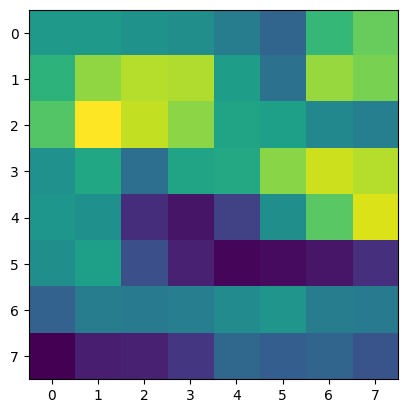

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(resultant_img)

In [ ]:
from skimage.transform import resize
resized_img = resize(resultant_img, output_shape=(128,128))

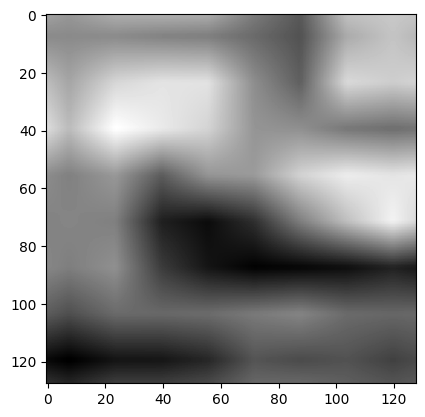

In [ ]:
plt.imshow(resized_img, cmap='gray')

In [ ]:
normalized_img = (resized_img - resized_img.min()) / (resized_img.max() - resized_img.min() )

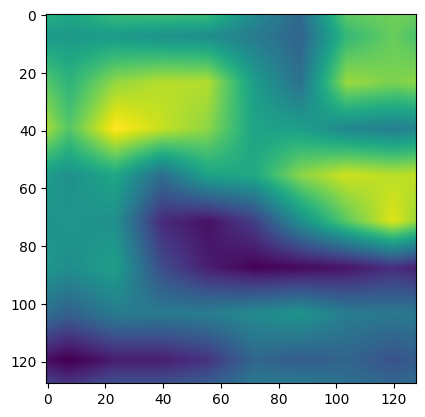

In [ ]:
plt.imshow(normalized_img)

In [ ]:
THRESHOLD = 0.7
defect_img = normalized_img > THRESHOLD

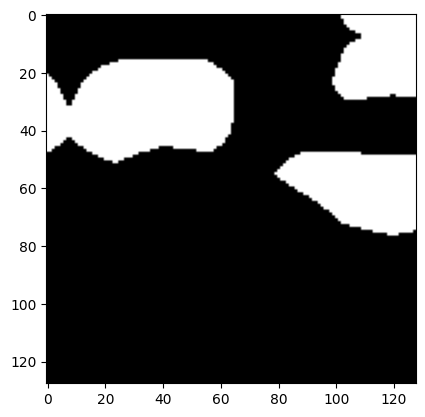

In [ ]:
plt.imshow(defect_img , cmap = 'gray')

In [ ]:
import numpy as np
# extract the column numbers which have the defect part
x_dim = np.max(defect_img , axis=0) * np.arange(0, defect_img.shape[1])
x_dim

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127])

In [ ]:
# extract the boundary columns
x_0 = (x_dim[x_dim > 0]).min()
x_1 = (x_dim[x_dim > 0]).max()
print(x_0, x_1)

1 127


In [ ]:
# extract the row numbers which have the defect part
y_dim = np.max(defect_img, axis=1) * np.arange(0, defect_img.shape[1])
y_dim

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0])

In [ ]:
y_0 = (y_dim[y_dim > 0]).min()
y_1 = (y_dim[y_dim > 0]).max()
print(y_0, y_1)

1 76


In [ ]:
# rectangle coordinates
pt1 = (x_0, y_0)
pt2 = (x_1, y_1)

In [ ]:
import cv2

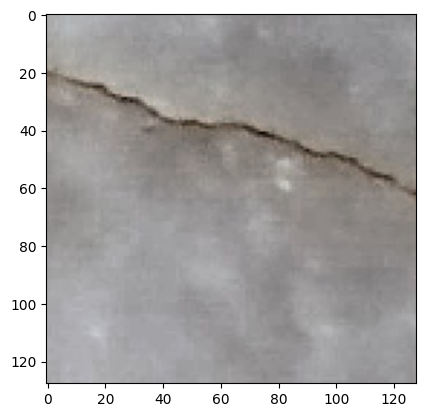

In [ ]:
original_img = load_img(path="/content/_1792_1024_20210531_11201_2.jpg",
               target_size = (128,128))
plt.imshow(original_img)

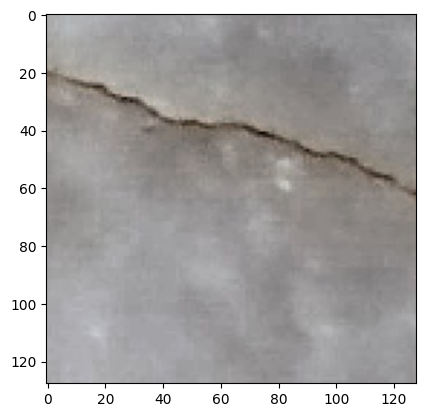

In [ ]:
# copy image to new variable
new_img = np.copy(original_img)
plt.imshow(new_img)

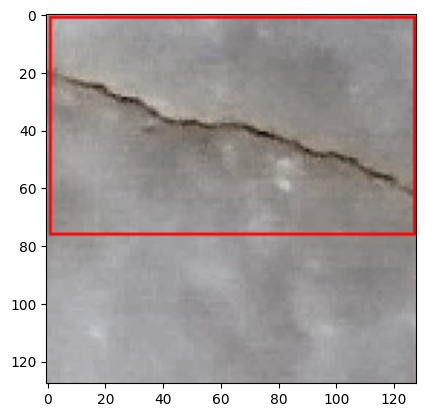

In [ ]:
cv2.rectangle(new_img, pt1, pt2, color=(255,0,0))
plt.imshow(new_img)